In [18]:
#Importing the Libraries and datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np

# Load the Salaries dataset
salaries_df = pd.read_csv('DataSets/Salaries.csv')

# Preprocess the data
salaries_df['rank'] = salaries_df['rank'].astype('category').cat.codes
salaries_df['discipline'] = salaries_df['discipline'].astype('category').cat.codes
salaries_df['sex'] = salaries_df['sex'].astype('category').cat.codes

salaries_df.head()


,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,2,1,19,18,1,139750
1,2,2,1,20,16,1,173200
2,3,1,1,4,3,1,79750
3,4,2,1,45,39,1,115000
4,5,2,1,40,41,1,141500


Use the concept of heat maps to visualize the degree of correlation between the variables.

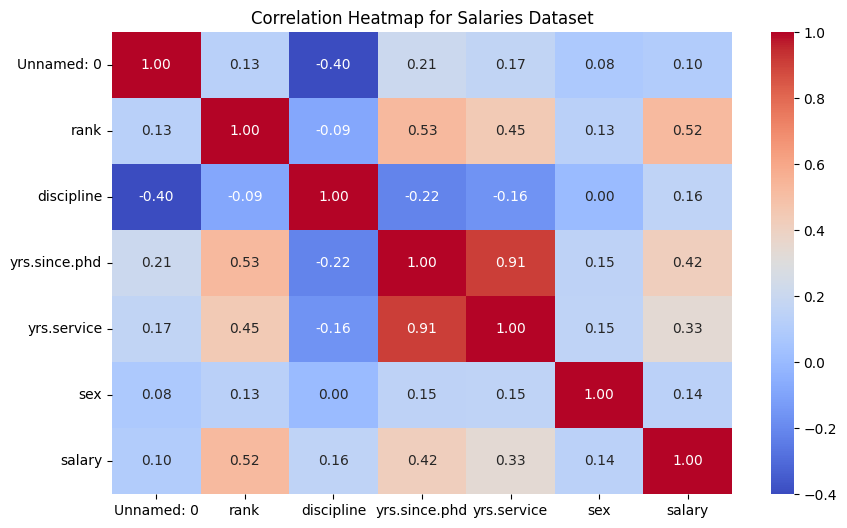

In [19]:
# Heatmap for Salaries dataset
plt.figure(figsize=(10, 6))
sns.heatmap(salaries_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Salaries Dataset')
plt.show()


Draw the scatter and regression plots for the given set of dependent and independent variables.

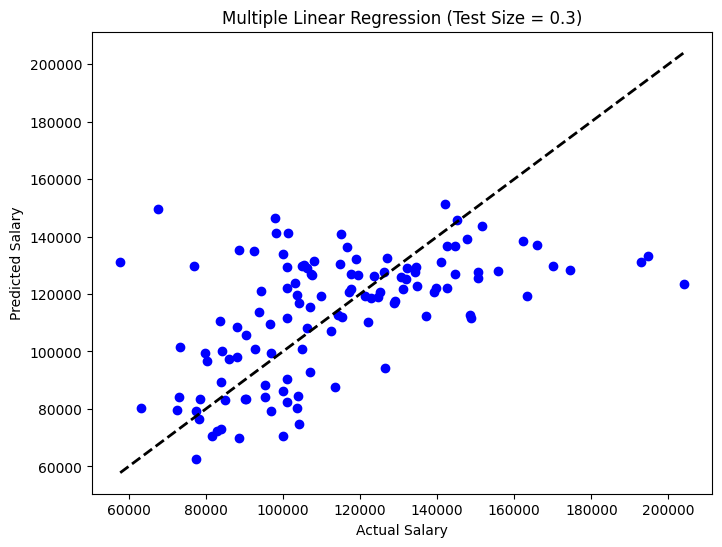

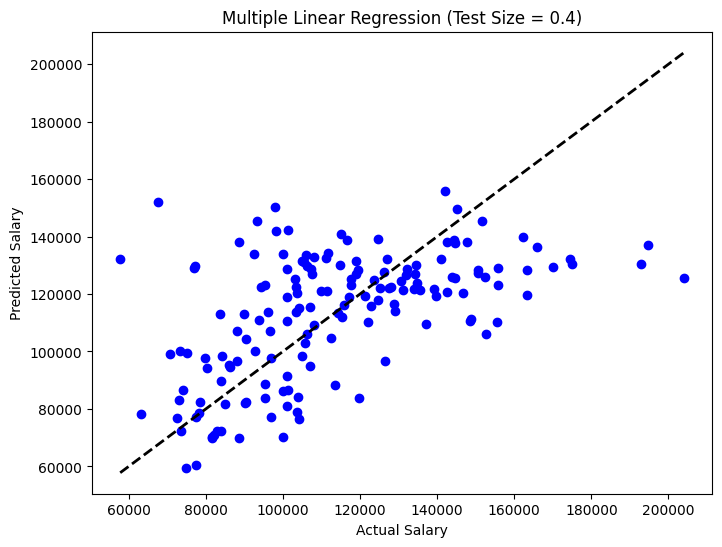

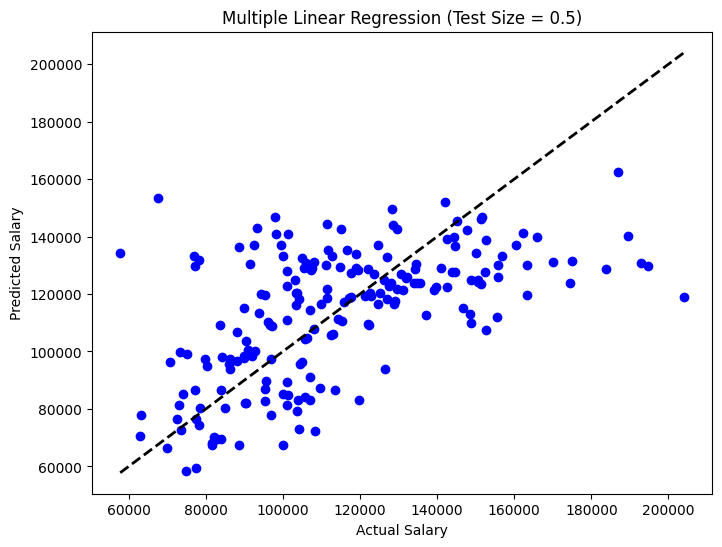

In [20]:
# Prepare data for Multiple Linear Regression
X = salaries_df.drop(columns=['salary'])  # Independent variables
y = salaries_df['salary']  # Dependent variable

# Loop through the specified test sizes
test_sizes = [0.3, 0.4, 0.5]
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Add a bias term (intercept) to the X matrices
    X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    
    # Calculate the regression coefficients using the Normal Equation
    theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
    
    # Make predictions
    y_pred = X_test_b.dot(theta_best)
    
    # Visualization of results
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual Salary')
    plt.ylabel('Predicted Salary')
    plt.title(f'Multiple Linear Regression (Test Size = {test_size})')
    plt.show()


2) With given data sets apply Logistic Regression and determine the appropriate regression
parameters.

c:\Users\dharm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


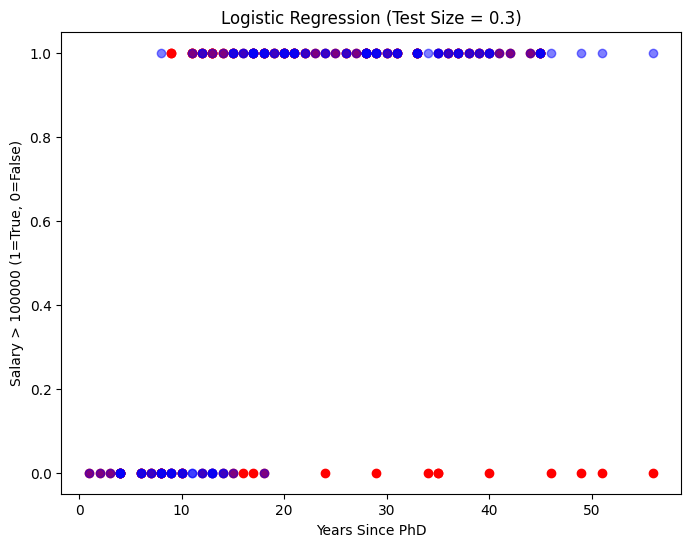

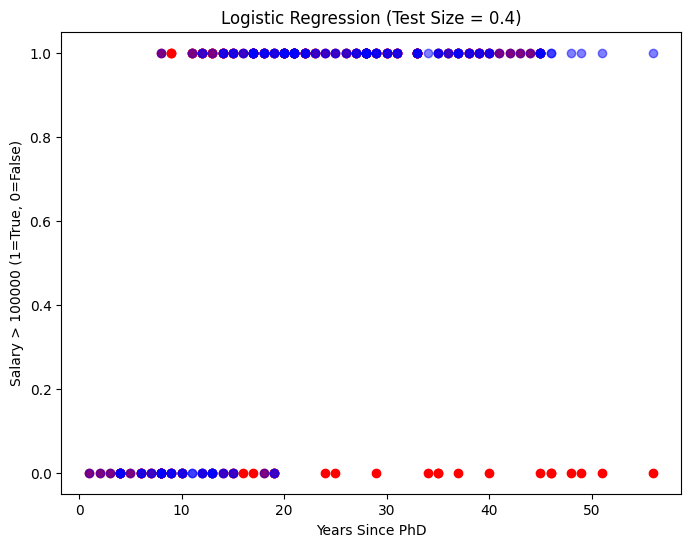

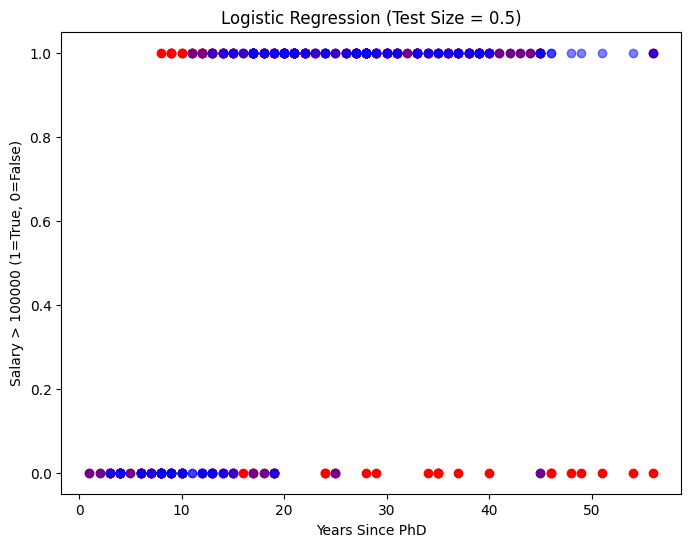

In [21]:
# Binary classification for Logistic Regression
threshold = 100000
y_binary = (salaries_df['salary'] > threshold).astype(int)

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=test_size, random_state=42)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict and visualize
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test['yrs.since.phd'], y_test, color='red')
    plt.scatter(X_test['yrs.since.phd'], y_pred, color='blue', alpha=0.5)
    plt.xlabel('Years Since PhD')
    plt.ylabel(f'Salary > {threshold} (1=True, 0=False)')
    plt.title(f'Logistic Regression (Test Size = {test_size})')
    plt.show()


3)Apply Gradient Descent on the following three regression algorithms:
 (a) Simple Linear Regression; (b) Multiple Linear Regression; and Logistic Regression.
And display the appropriate values of parameters which result in reduction of the respective cost
functions.

c:\Users\dharm\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\dharm\AppData\Local\Temp\ipykernel_25168\2072593910.py:6: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(np.square(predictions - y))
C:\Users\dharm\AppData\Local\Temp\ipykernel_25168\2072593910.py:14: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (1/m) * learning_rate * (X.T.dot(X.dot(theta) - y))


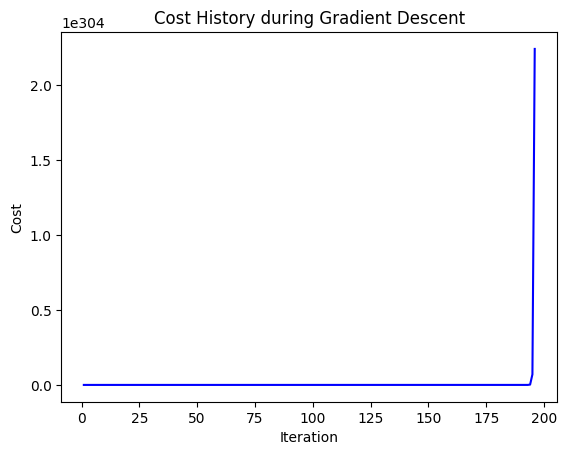

In [22]:
# Implement Gradient Descent for Simple Linear Regression

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        theta = theta - (1/m) * learning_rate * (X.T.dot(X.dot(theta) - y))
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

# Example with 'yrs.since.phd' feature
X_simple = salaries_df['yrs.since.phd'].values.reshape(-1, 1)
X_simple_b = np.c_[np.ones((X_simple.shape[0], 1)), X_simple]
y = salaries_df['salary'].values.reshape(-1, 1)
theta = np.random.randn(2, 1)

learning_rate = 0.01
iterations = 1000
theta_best, cost_history = gradient_descent(X_simple_b, y, theta, learning_rate, iterations)

# Visualize Cost History
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.title('Cost History during Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()
